In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('E:/Xzane/Priyesh/Courses - Training materials/Simplilearn/Machine Learning/class notes,ppt,ipynb,datasets,etc/Time_Series_Analysis/Data/starbucks.csv')#,parse_dates=True,index_col='Date')

In [3]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [4]:
df.info() # date column is object.. so need to change to datetime64 format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
 2   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ KB


#### Faster method

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date',inplace=True)

In [7]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [9]:
df.describe()

,Close,Volume
count,1006.000000,1.006000e+03
mean,54.070133,9.617402e+06
std,4.849600,4.986199e+06
min,36.974800,2.215418e+06
25%,52.170075,6.828217e+06
50%,54.631600,8.338076e+06
75%,56.603475,1.091071e+07
max,68.353000,6.209107e+07


In [10]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## Time Resampling

When we will resample we need to pass a rule param then aggregate data based on that rule.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="13%">
<col width="87%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter end frequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A, Y</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA, BY</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS, YS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS, BYS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [11]:
df.resample(rule='A').sum()

,Close,Volume
Date,,
2015-12-31,12619.6811,2179595896
2016-12-31,13580.7164,2343759515
2017-12-31,13919.7849,2333315537
2018-12-31,14274.3712,2818435669


## Custom Resampling Functions

In [12]:
# Returns the first instance of the period

def first_day(entry):
    if len(entry):
        return entry[0]

In [13]:
df.resample('A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


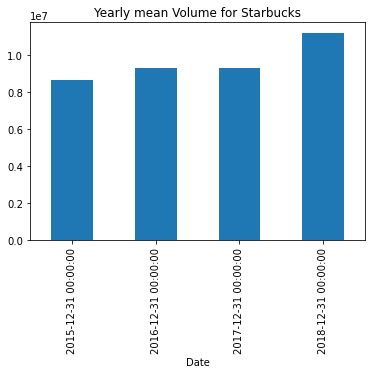

In [14]:
%matplotlib inline
df['Volume'].resample('A').mean().plot.bar(title='Yearly mean Volume for Starbucks');

<AxesSubplot:title={'center':'Monthly max closing price - Starbucks'}, xlabel='Date'>

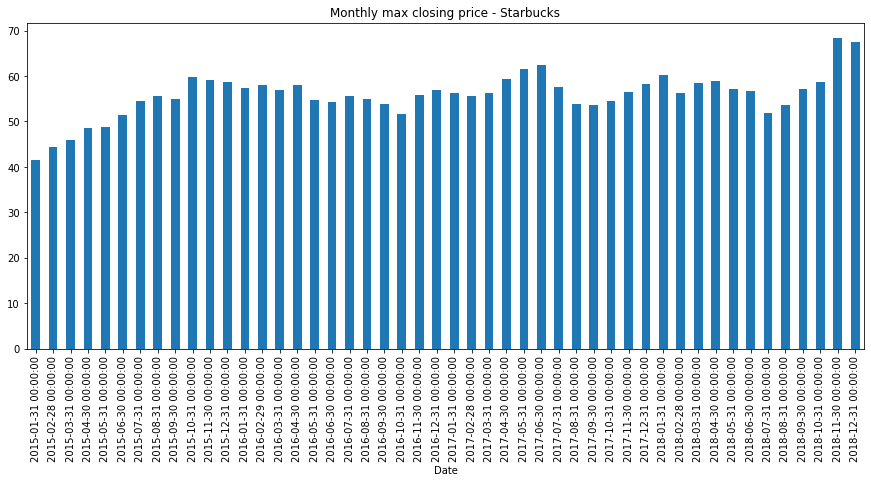

In [15]:
title='Monthly max closing price - Starbucks'

df['Close'].resample('M').max().plot.bar(figsize=(15,6),title=title)

# Time Shifting

In [16]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [17]:
df.tail(14)

,Close,Volume
Date,,
2018-12-11,65.92,10903364
2018-12-12,66.13,11116217
2018-12-13,66.91,10016213
2018-12-14,65.34,16834020
2018-12-17,64.47,15143054
2018-12-18,64.92,10523476
2018-12-19,64.06,14390146
2018-12-20,62.15,20264918
2018-12-21,61.39,23524888


# Shift forward

In [18]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [19]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


# Shift backwards

In [20]:
#df['Close-1']=df['Close'].shift(-1).head()

In [21]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [22]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


### Shift basis time frequency code, refer to the time series offset aliases above

In [23]:
# Shift everything forwards one month
df.shift(periods=1,freq='M').head() # All the values for Jan(01) has been shifted to 31st Jan

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling Window

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


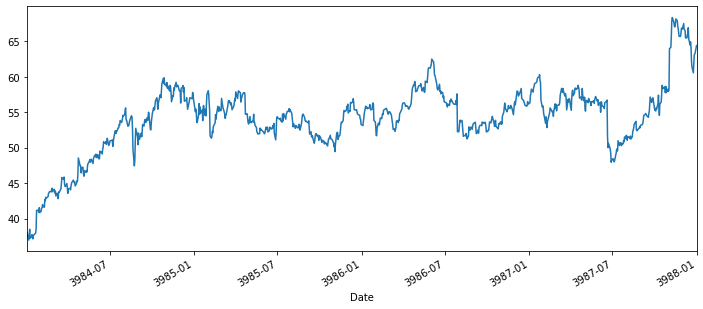

In [24]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [25]:
df.rolling(window=7).mean().head(15) # shift the data by 6 days and take the mean of prev 6 days and place on 7th day

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

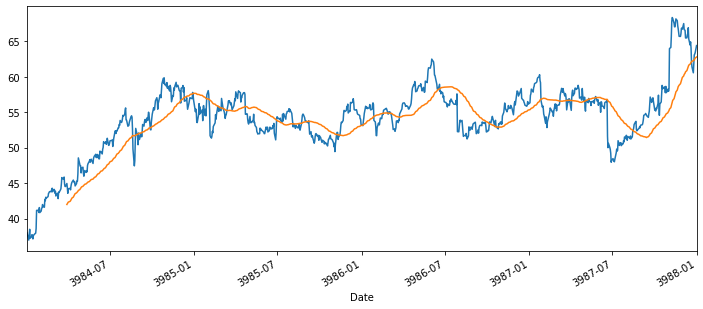

In [26]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=60).mean()['Close'].plot()

# Visualizing Timeseries

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

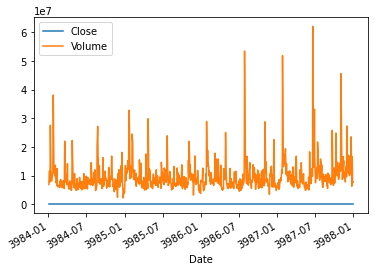

In [27]:
df.plot()

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

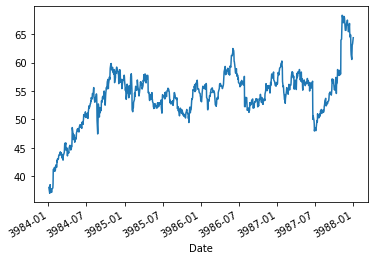

In [28]:
df['Close'].plot()

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

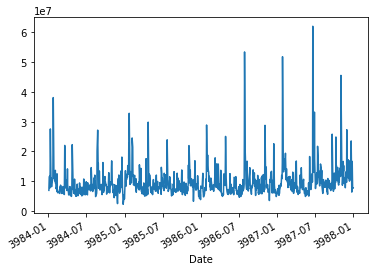

In [29]:
df['Volume'].plot()

### Plotting slices of dataframe

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

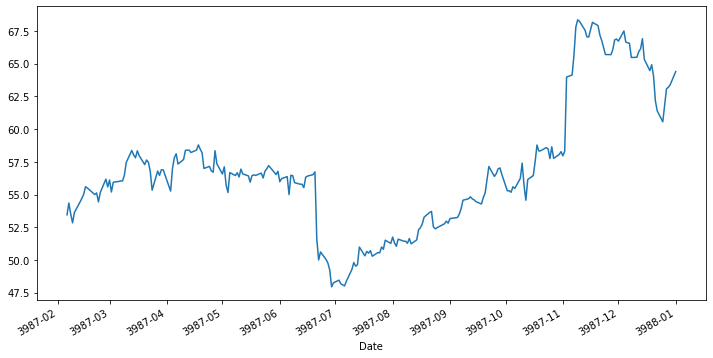

In [30]:
df['Close']['2018-02-03':'2019-07-03'].plot(figsize=(12,6))

In [31]:
df['Close']['2018-02-03':'2019-07-03'].max()

68.35300000000001

In [32]:
df['Close']['2018-02-03':'2019-07-03'].min()

47.946999999999996

C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\priye\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

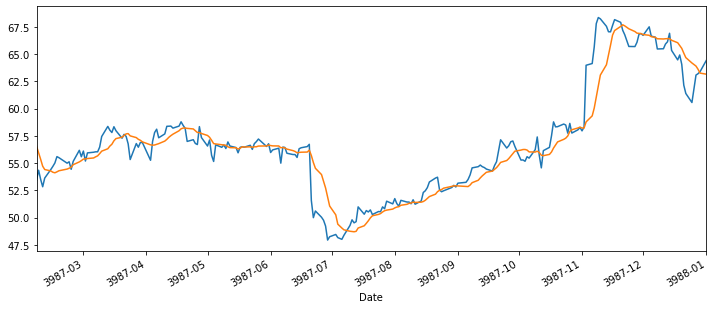

In [33]:
#df['Close']['2018-02-03':'2019-07-03'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

df['Close']['2018-02-03':'2019-07-03'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=10).mean()['Close']['2018-02-03':'2019-07-03'].plot()